In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import re
import jieba

#coding:utf-8
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#有中文出现的情况，需要u'内容'

In [3]:
filepath = 'shishenling.csv'
# 添加行标题
data = pd.read_csv(filepath,header=None,names=['用户ID','评分星级','点赞数','发布日期','评论内容'])

In [4]:
 
# 查看数据整体信息
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   用户ID    594 non-null    object
 1   评分星级    594 non-null    int64 
 2   点赞数     594 non-null    int64 
 3   发布日期    594 non-null    object
 4   评论内容    594 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.3+ KB
None


In [6]:
# 查看数据前5个
data

,用户ID,评分星级,点赞数,发布日期,评论内容
0,豆瓣路人己,2,3150,['2021-02-12'],听说过这片子不如《晴雅集》，看之前我不信，看完之后，我深信！
1,孙柔软,3,5385,['2021-02-12'],确定不是打着陈坤和周迅的幌子捧渣男和瞪眼妹？
2,六姨太,4,1117,['2021-02-12'],周迅一双鹿眼真是好看，那天生就是要登大银幕的。
3,华盛顿樱桃树,3,1697,['2021-02-12'],好久没见这么饱和的视效大片，好过之前某版。陈坤周迅一出来就显得片子好贵，就想看这些老牌大明星...
4,鬈毛毛,1,2097,['2021-02-12'],好久没在大荧幕上看mv了，观感不错，我这就携全家给郭敬明道歉去
...,...,...,...,...,...
589,Zooey,1,64,['2021-02-12'],一星给美术
590,金鱼多喝水,1,58,['2021-02-12'],建议改成博雅传，周迅全程躺着歇菜，剧情各种作，逻辑还能漏洞百出一点吗？请所有骂过晴雅集的出来...
591,正义B胜,2,74,['2021-02-12'],也不知道该怪李蔚然太无能，还是张家鲁太懈怠，又或者，纯粹是奇幻这个类型气数已尽？但是，陈坤周...
592,森林海33,1,59,['2021-02-12'],被晴雅集吊打！


array([[<AxesSubplot:title={'center':'评分星级'}>]], dtype=object)

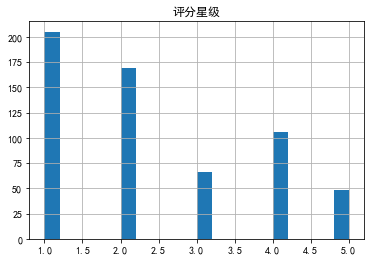

In [7]:
data.hist(u"评分星级",bins=20)

In [8]:
# 将所有评论变为一个字符串
comments = ''
for k in range(len(data['评论内容'])):
    comments = comments +(str(data['评论内容'][k])).strip()
 
print(comments)

父母辈的歉意，感激以及遗憾，还有对80年代的怀念。笑点，泪点转化节奏很好。表演和情节上，也许感情更克制一些会更好，但是谁又能苛求在自己母亲面前克制住感情呢？非常出色的喜剧影片。贾玲用实际行动证明。把心掏出来的真诚是有回报的。笑点不尬接地气，后半段哭的崩溃。贾玲牛逼，陈思诚去死什么是打动人的好故事？贾玲做了一个很好的示范，故事本身永远大于技巧。电影结束之后，我妈从我手心里扣走被我哭湿的纸巾扔进垃圾桶，那一刻我真的特别特别幸福。看哪，贾晓玲考上了艺校，打铁娘子队赢得了新的搪瓷杯，王琴靠自己的努力过上了更好的日子，而李焕英，她得到了一次重返青春的机会，真好。这些女孩都有光明的未来，而这也就是中国电影需要更多女性视角的原因。（理性角度来看，这部电影自带的一些争议以及很多稚嫩的处理手法，确实不应该拿到五星。但是揉揉自己哭肿了的眼睛，我确实没办法公正的打分。一颗心都捧出来给观众看了，这不叫技巧性煽情，而叫真诚。）每位演员的表现都让这个剧本变得更加熠熠生辉（包括热评里觉得多余的一些角色的演员），而这部电影也证明了，不用一些带有性别倾向的梗（无贬低之意），也能让人发自内心地笑出来。最后表白结尾的文字：每个母亲，都曾经是少女。而在母亲这个身份之前，请不要忘记她是一个独立的人。不敢相信这是贾玲拍的，前半段令人昏昏欲睡，但在小玲发现李焕英给自己缝动物时剧情开始推向高潮，在这个节点推翻了观众对之前剧情的所有预设，并不是女儿回到过去成就妈妈，而是妈妈为女儿书写最后一封家书。整部电影也是贾玲对母亲的纪念。贾玲妈妈喜欢幽默的人，所以贾玲……不至于不至于，逻辑都没有，从电影层面来说问题太多我哭得稀里哗啦，我妈反而平淡地说：“哪个当妈的不是这样”，我觉得那么那么伟大的东西在她看来是最平凡的、是她“应该做的”，认识到这点我哭得更大声。张小斐真的太适合大荧幕了，作为贾玲的处女作，这部电影完全合格，最后的反转我竟然没猜到，前面三分之二都在笑，后面三分之一整个电影院都是哽咽声。不管是亲情题材、穿越题材还是喜剧题材类电影中，这一部都算中规中矩，这个8.2实在是夸张，我很喜欢贾玲，但这和电影本身好不好没有关系，这届豆瓣已经不是我当初看电影前必来做功课的那个豆瓣了一开头我就想哭怎么回事……年度催泪大品，笑点哭点都很密集，实在太煽了。很好笑，笑点完全不尴尬，结尾虐死我了现在国内电影圈真的是什么阿猫啊狗都能当导演看过

In [9]:
# 使用正则表达式去标点和表情
pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)
 
print(cleaned_comments)

些角色的演员而这部电影也证明了不用一些带有性别倾向的梗无贬低之意也能让人发自内心地笑出来最后表白结尾的文字每个母亲都曾经是少女而在母亲这个身份之前请不要忘记她是一个独立的人不敢相信这是贾玲拍的前半段令人昏昏欲睡但在小玲发现李焕英给自己缝动物时剧情开始推向高潮在这个节点推翻了观众对之前剧情的所有预设并不是女儿回到过去成就妈妈而是妈妈为女儿书写最后一封家书整部电影也是贾玲对母亲的纪念贾玲妈妈喜欢幽默的人所以贾玲不至于不至于逻辑都没有从电影层面来说问题太多我哭得稀里哗啦我妈反而平淡地说哪个当妈的不是这样我觉得那么那么伟大的东西在她看来是最平凡的是她应该做的认识到这点我哭得更大声张小斐真的太适合大荧幕了作为贾玲的处女作这部电影完全合格最后的反转我竟然没猜到前面三分之二都在笑后面三分之一整个电影院都是哽咽声不管是亲情题材穿越题材还是喜剧题材类电影中这一部都算中规中矩这个实在是夸张我很喜欢贾玲但这和电影本身好不好没有关系这届豆瓣已经不是我当初看电影前必来做功课的那个豆瓣了一开头我就想哭怎么回事年度催泪大品笑点哭点都很密集实在太煽了很好笑笑点完全不尴尬结尾虐死我了现在国内电影圈真的是什么阿猫啊狗都能当导演看过小品版李焕英的朋友都知道这是一部女儿穿越到年代和自己妈妈成为朋友的温情故事改编成电影后女儿与少女时期妈妈相处的情节更添丰富细腻和搞笑片尾新增的小反转女儿发现不只是自己穿越回来更是令人泪目很多质朴的台词尽管早就看过听到英子说我的女儿我只想她健康快乐就好还是又掉下了眼泪打我们有记忆起妈妈就是个中年妇女的样子希望各位父母子女都能来看看这部片子想起自己的妈妈曾经也是个花季少女提醒大家一定要重视片中的小狗元素贾晓玲的白恤和英子给玲破洞裤补上的小狗花纹李焕英和春节档的其他大片一对比验证了一个道理会讲故事一份亲情和孝心就可以卖四十亿不会讲故事再多的钱做特效堆明星搞大场面都是给人做陪衬的笑柄在赢得大众上质朴的情感永远是第一位的创作者尊重自己才能赢得观众赢的多少就看你与多少人契合从电影层面于己不满足价值观上的单一和情绪的过于满溢但谁受得了母亲拿票又下车还要夸的一点是演员表演好张小斐好大家都从小品出发但离电影还是挺近的陈赫沈腾特别适合九十年代复古风我愿称之为今年春节档最强小兔子跟大兔子说我爱你从这里到月球那么长大兔子等小兔子睡着了说我爱你从这里到月球再折返回来贾玲一战封神穿越实在烂大街了再加什么

In [10]:
# 分词
segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})
 
words_df.head()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\quzhe\AppData\Local\Temp\jieba.cache
Loading model cost 0.838 seconds.
Prefix dict has been built successfully.


,segment
0,你
1,以为
2,你
3,已经
4,很


In [11]:
# 去停用词
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
 
words_df.head(10)

,segment
0,你
1,以为
2,你
3,已经
5,爱
7,爱
8,妈妈
10,但
11,妈妈
12,远比


In [13]:
# 词频统计
import numpy 
 
words_stat=words_df.groupby(by=['segment'])['segment'].agg([("计数",numpy.size)])
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
 
words_stat.head(20)

,segment,计数
3439,电影,254
4263,贾玲,242
1650,她,224
1694,妈妈,188
2846,有,186
604,你,171
1313,哭,170
165,不,159
4156,让,143
3030,母亲,131


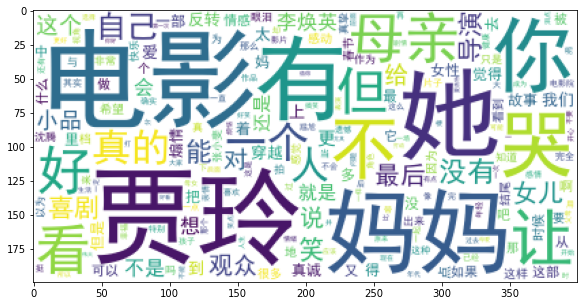

In [14]:
# 词云显示
import matplotlib.pyplot as plt
%matplotlib inline
 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包
from wordcloud import WordCloud,ImageColorGenerator # 词云包
 
wordcloud=WordCloud(font_path="simhei.ttf",background_color="white",max_font_size=80) #指定字体类型、字体大小和字体颜色
word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
word_frequence_list = []
for key in word_frequence:
    temp = (key,word_frequence[key])
    word_frequence_list.append(temp)
 
wordcloud=wordcloud.fit_words(word_frequence)
 
#image_colors = ImageColorGenerator(bg_pic) # 根据图片生成词云颜色
plt.imshow(wordcloud)
wordcloud.to_file('shishenling.png')  # 把词云保存下来